##### Отправляем сообщения всегда, но узел может быть не активен (блокирован) тогда сообщение ставится в очередь на узел
##### узел считается свободным если очередь < L*0,5
MultiplierThresholdToBlock 100, FractionThresholdToUnBlock 0,5, UseOnlyIsActiveNodes True, NumberOfGenerations 120 <br>
<strong>Поток Quantity 100 </strong>

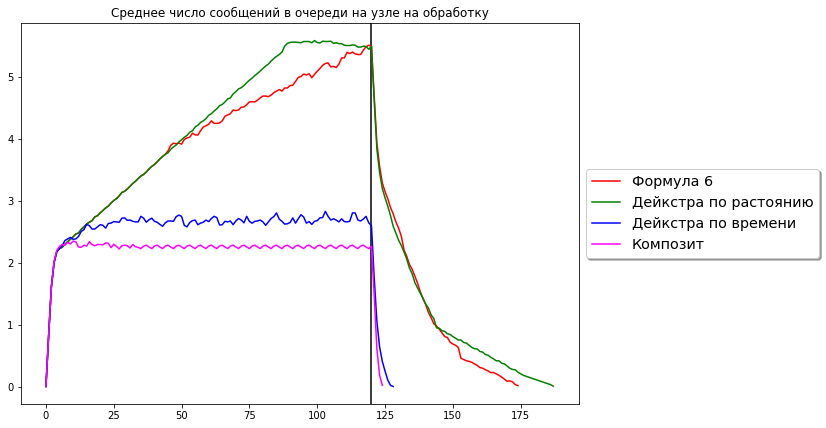

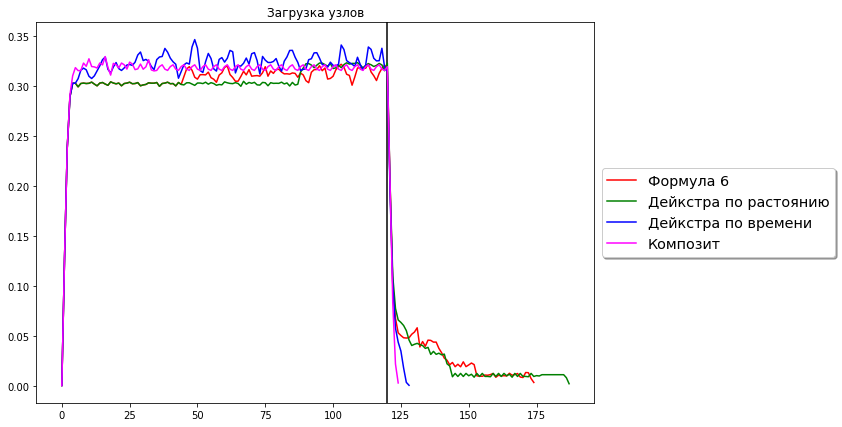

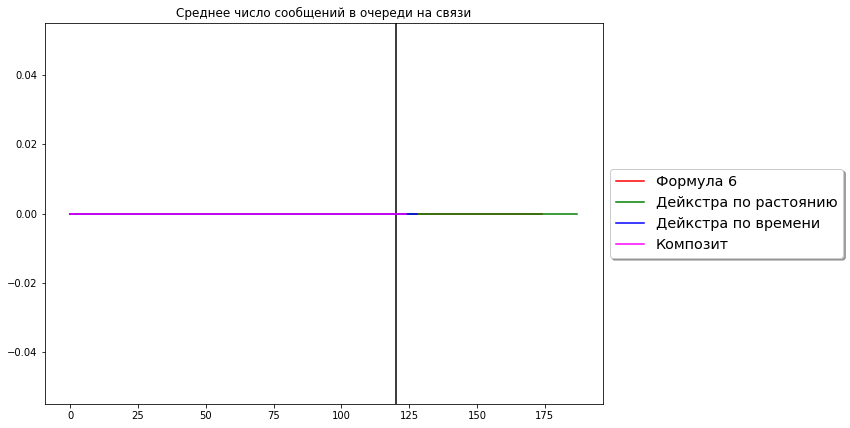

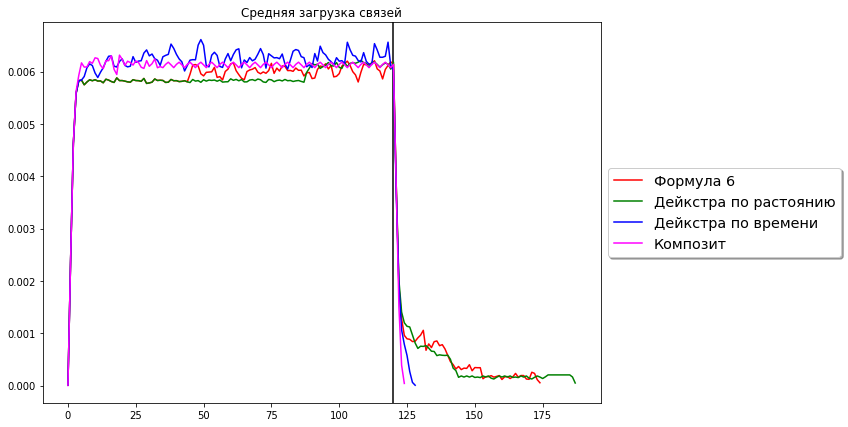

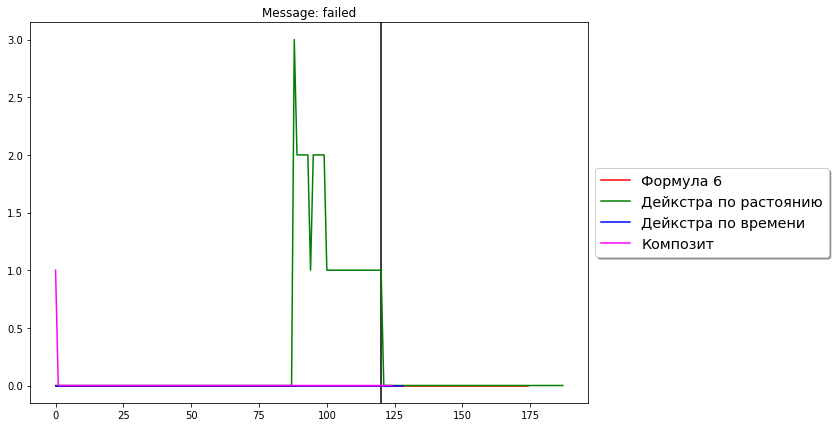

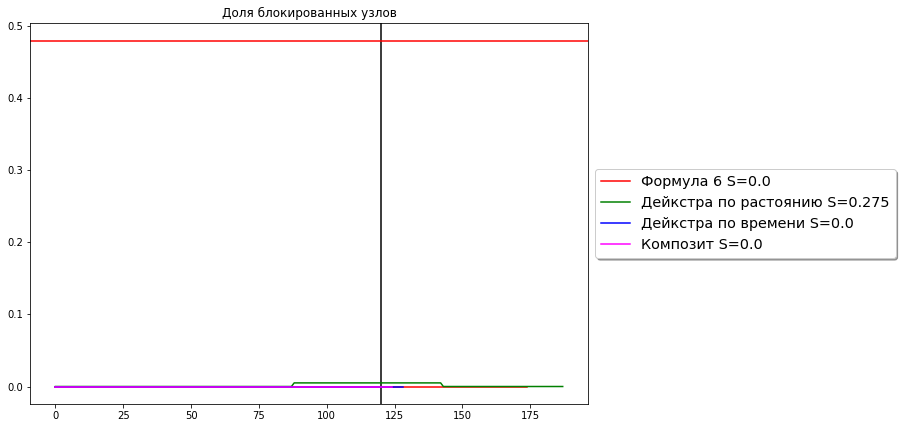

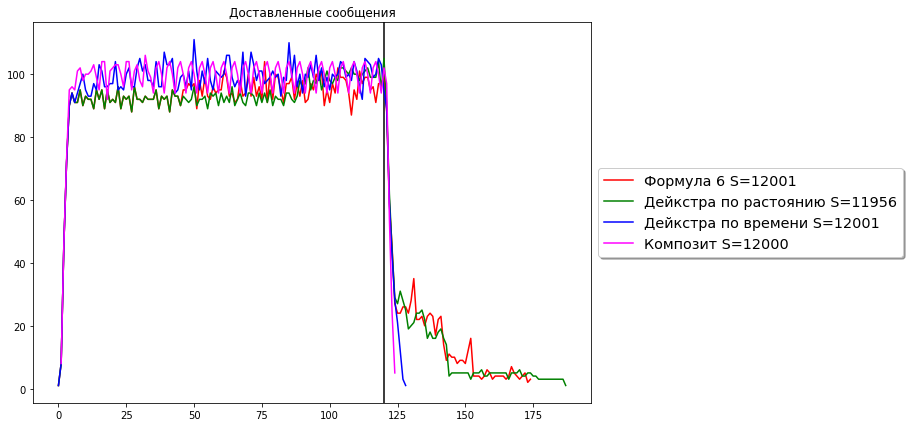

In [5]:
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime
import pandas as pd
import os
  
log_dir_path = os.path.abspath('..\\')+"\\Result"

log_tags = [
 {"tag":  "b0fee554-2910-4b2f-8303-3cc05bd327ee", "label": "Формула 6", "color": "red"},
 {"tag":  "e031add3-765e-46a4-a13a-280910c58918", "label": "Дейкстра по растоянию", "color": "green"},
 {"tag":  "f7df570e-8c14-40a1-b07e-d5ac62bf30af", "label": "Дейкстра по времени", "color": "blue"},
 {"tag":  "9de56dae-a164-482a-a604-0dbff33d406b", "label": "Композит", "color": "magenta"},
 
]

files = [
    {"filename": "Netsim-Node-Metrics-queue-{log_tag}", "title": "Среднее число сообщений в очереди на узле на обработку" },
    {"filename": "Netsim-Node-Metrics-load-{log_tag}", "title": "Загрузка узлов" },
    {"filename": "Netsim-Connection-Metrics-queue-{log_tag}", "title": "Среднее число сообщений в очереди на связи"},
    {"filename": "Netsim-Connection-Metrics-load-{log_tag}", "title": "Средняя загрузка связей"},
    {"filename": "Netsim-Message-Metrics-failed-{log_tag}", "title": "Message: failed"},
]

filesBlocked = [
    {"filename": "Netsim-Node-Metrics-blocked-{log_tag}", "title": "Доля блокированных узлов" },
]

filesMessage = [
    {"filename": "Netsim-Message-Metrics-{log_tag}", "title": "Доставленные сообщения" },

]
          
def load_csv_file(path):
    file = open(path)
    data = file.readlines()
    splitted_data = [x.split(',') for x in data]
    return splitted_data, len(splitted_data[0])


def aggeregate_line(array):
    aggregated = [sum([float(y) for y in x])/len(x) for x in array]
    return aggregated, len(aggregated)


def plot(x, y, x2, y2, title):
    fig, ax = plt.subplots()
    ax.plot(x, y, label=title, c="blue")
    ax.plot(x2, y2, label=title, c="red")
    ax.set_title(title)
    plt.axvline(x=500, c="green")

def showStat():
    for file in files:
        fig, ax = plt.subplots()
        plt.rcParams['figure.figsize'] = [10, 7]
        ax.set_title(file['title'])
        plt.axvline(x=120, c="black")
       
        for log_tag in log_tags:
            data, line_len = load_csv_file(f"{log_dir_path}/{file['filename'].format(log_tag = log_tag['tag'])}")
            aggregated, count = aggeregate_line(data)
            ax.plot(range(0, count), aggregated, c=log_tag['color'], label=log_tag['label'])    
            legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), shadow=True, fontsize='x-large')
            legend.get_frame()
                                   
    plt.show()
                                           
def aggeregate_line_perc_node(array):
    aggregated = [sum([1 for y in x if float(y) > 0])/len(x) for x in array]
    return aggregated, len(aggregated)

def showStatBlocked():
    for file in filesBlocked:
        fig, ax = plt.subplots()
        plt.rcParams['figure.figsize'] = [10, 7]
        ax.set_title(file['title'])
        plt.axvline(x=120, c="black")
        plt.axhline(y=0.48, color='r', linestyle='-')
       
        for log_tag in log_tags:
            data, line_len = load_csv_file(f"{log_dir_path}/{file['filename'].format(log_tag = log_tag['tag'])}")
            aggregated, count = aggeregate_line_perc_node(data)
            summ = np.sum(aggregated)
            ax.plot(range(0, count), aggregated, c=log_tag['color'], label=log_tag['label']+' S='+str(summ))    
            legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), shadow=True, fontsize='x-large')
            legend.get_frame()


def str2bool(v):
    return v.lower() in ("yes", "true", "t", "1")

def load_csv_file_message(path):
    file = open(path)
    data = file.readlines()
    t = datetime(2021,6,1,1)
   
    splitted_data = [(str2bool(x.split(',')[-2]), (datetime.strptime(x.split(',')[-1], '%d.%m.%Y %H:%M:%S\n')-t).total_seconds())  for x in data]
    df = pd.DataFrame(data=splitted_data,  columns=['Resived', 'Time'])
    df = df.loc[df['Resived'] == True]
    agg= df.groupby(['Time']).count()
     
    return agg['Resived'].to_numpy(), agg.index.get_level_values(0).to_numpy()

def showStatMessage():
    for file in filesMessage:
        fig, ax = plt.subplots()
        plt.rcParams['figure.figsize'] = [10, 7]
        ax.set_title(file['title'])
        plt.axvline(x=120, c="black")
       
        for log_tag in log_tags:
            data, line_len = load_csv_file_message(f"{log_dir_path}/{file['filename'].format(log_tag = log_tag['tag'])}")
            summ = np.sum(data)
            ax.plot(line_len, data, c=log_tag['color'], label=log_tag['label']+' S='+str(summ))    
            legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), shadow=True, fontsize='x-large')
            legend.get_frame()
    plt.show()
      
                             
showStat()
showStatBlocked();  
showStatMessage(); 

<strong>Quantity 300 </strong>

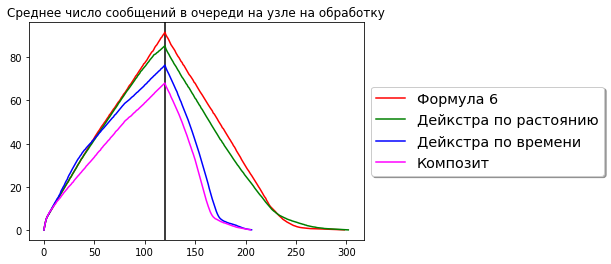

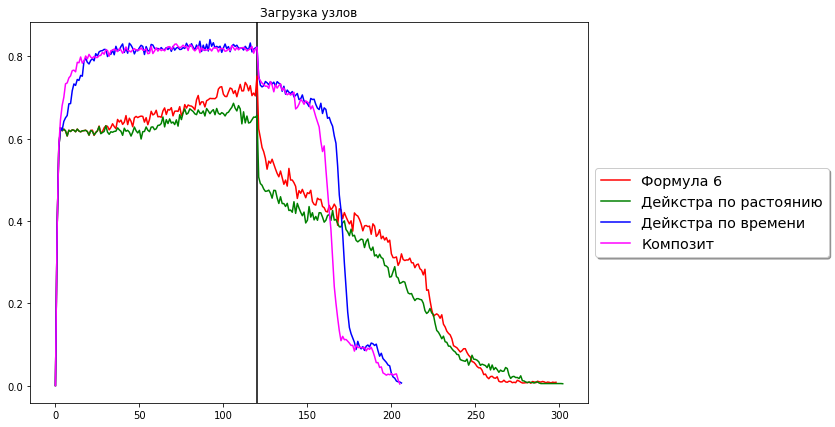

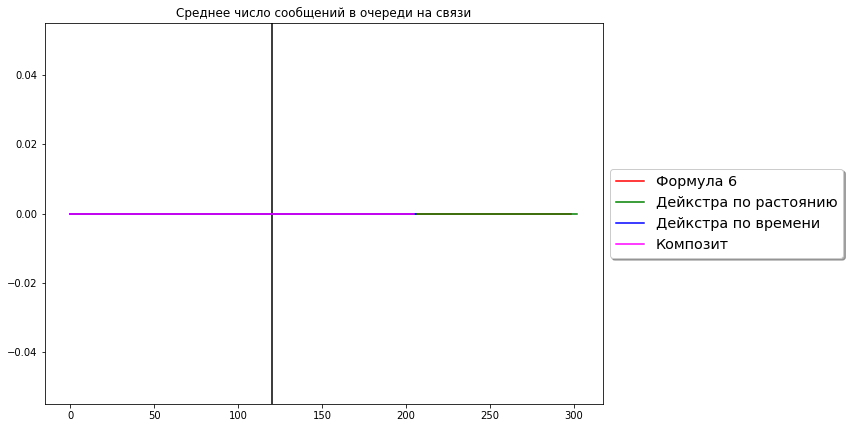

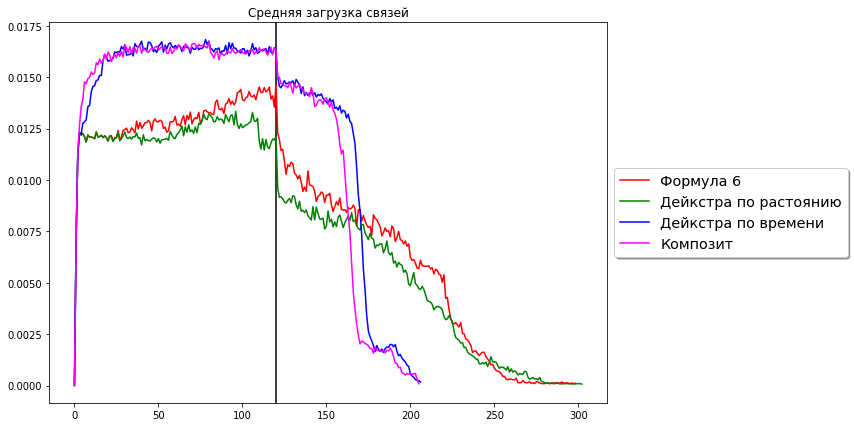

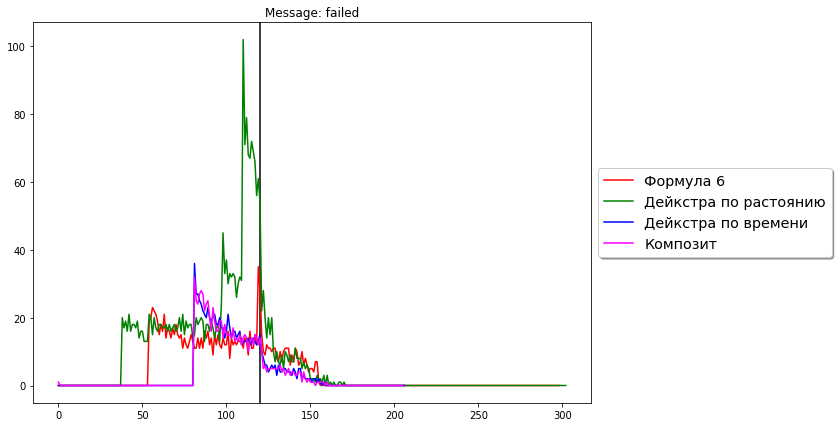

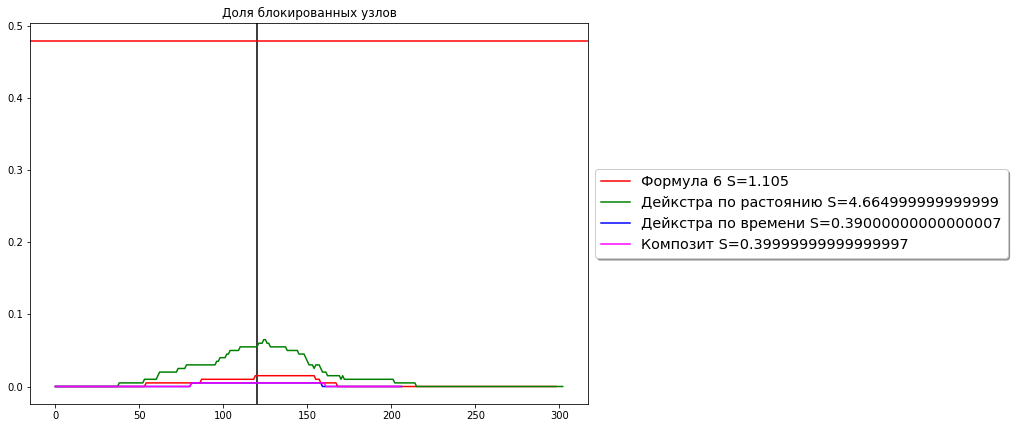

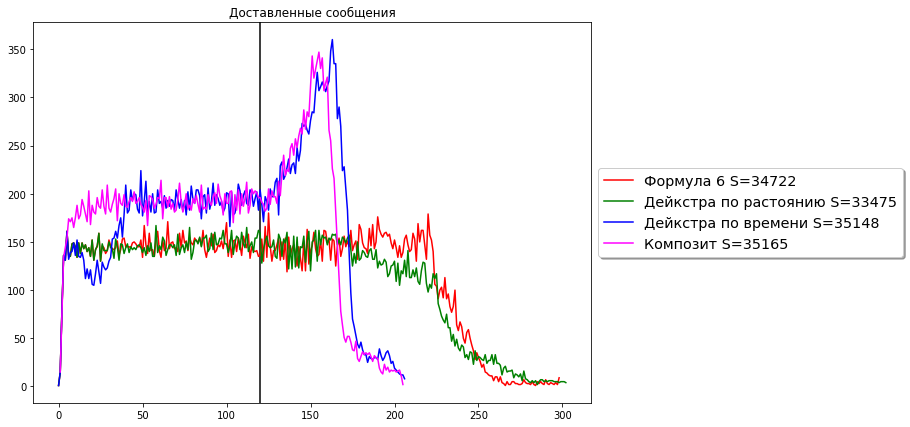

In [2]:
log_tags = [
 {"tag":  "31c107d7-dac8-4b48-aeb9-30cfdedfb438", "label": "Формула 6", "color": "red"},
 {"tag":  "5aa8a2dc-5bfa-45e6-9e9d-d3b363ab727e", "label": "Дейкстра по растоянию", "color": "green"},
 {"tag":  "cbf6be42-7cea-48b6-9ec2-3d789aeff987", "label": "Дейкстра по времени", "color": "blue"},
 {"tag":  "ff5395c3-3fda-4ab2-b1c5-f89d11694baf", "label": "Композит", "color": "magenta"},
]
showStat()
showStatBlocked();  
showStatMessage(); 

<strong>Quantity 500 </strong>
 

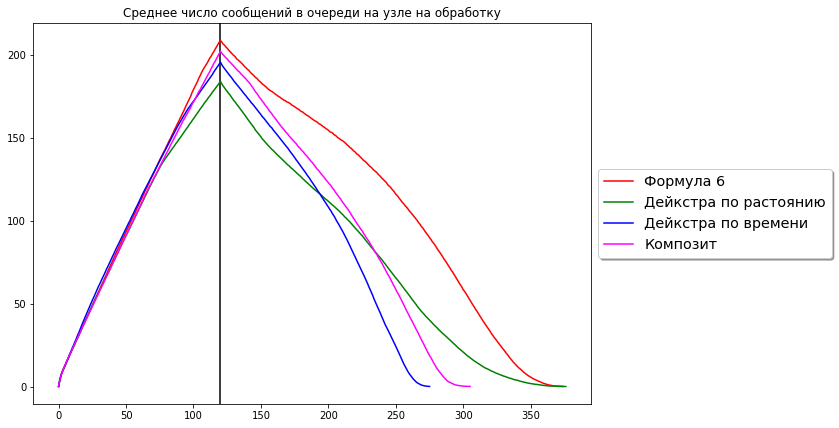

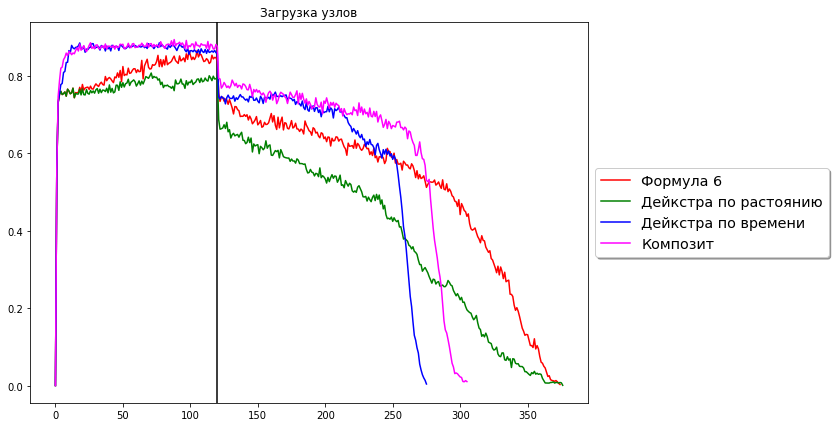

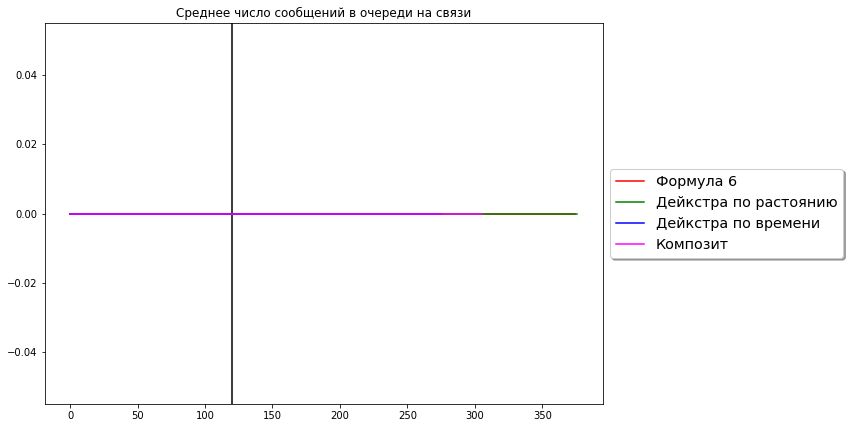

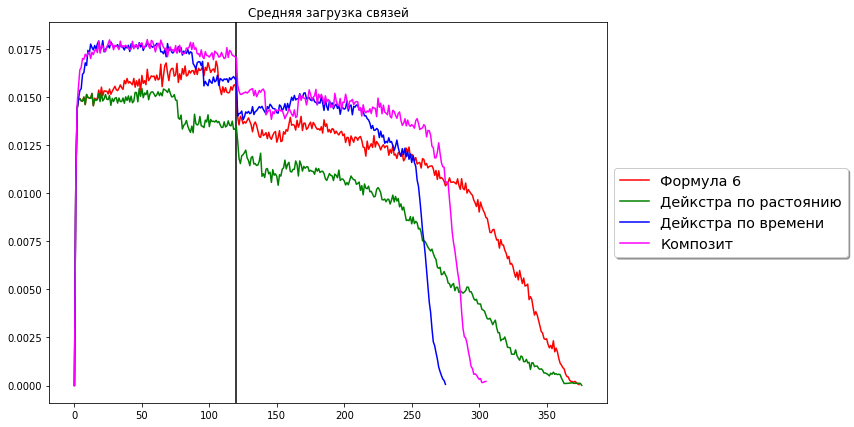

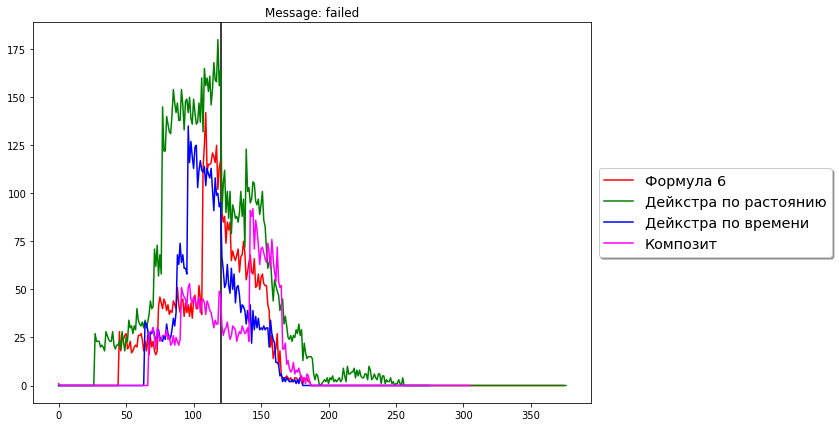

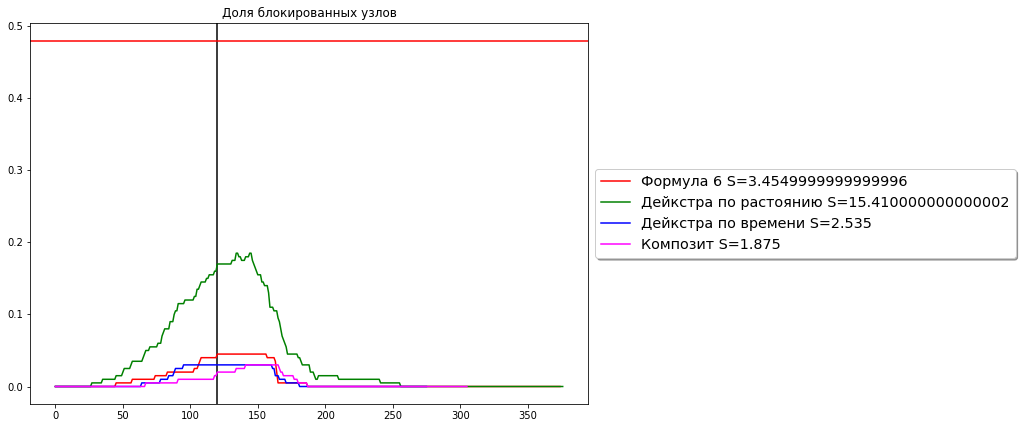

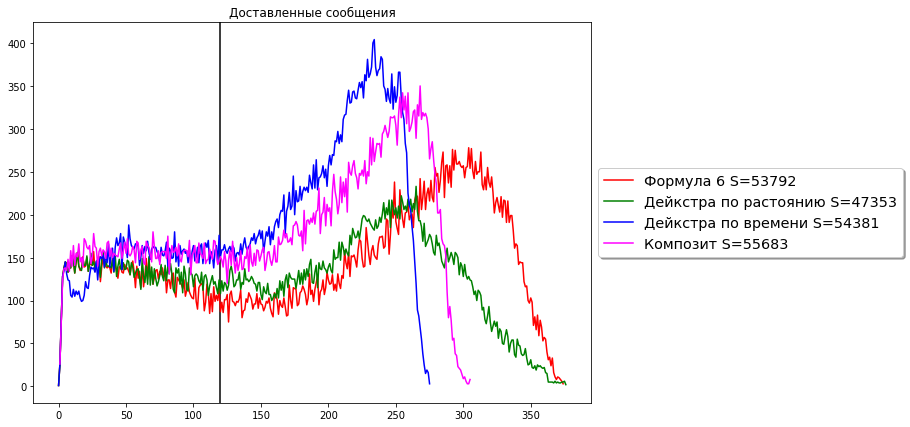

In [3]:
log_tags = [
 {"tag":  "1776c0f6-08ad-449f-86d6-3c3297b370a0", "label": "Формула 6", "color": "red"},
 {"tag":  "07da7eb6-08c2-4aa8-b14f-7d2fc67b21dc", "label": "Дейкстра по растоянию", "color": "green"},
 {"tag":  "c36cfe51-2cab-4c22-88f1-1a30863bad98", "label": "Дейкстра по времени", "color": "blue"},
 {"tag":  "ae4f5602-b90b-41ba-a164-0a34fbd89205", "label": "Композит", "color": "magenta"},
]
showStat()
showStatBlocked();  
showStatMessage();

<strong>Quantity 1000 </strong>

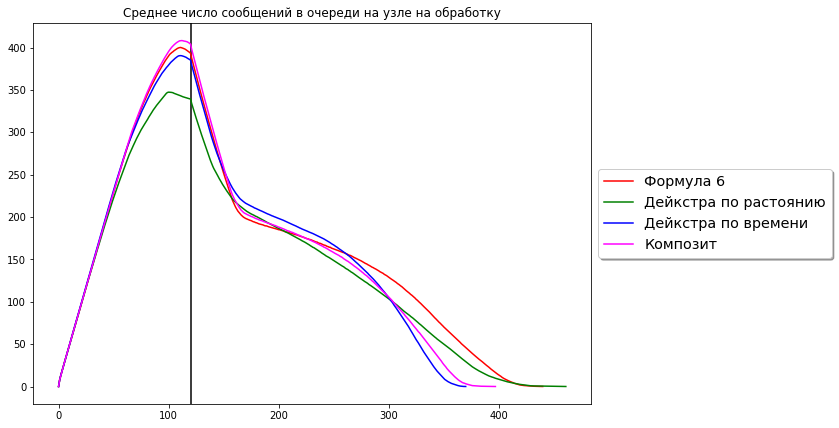

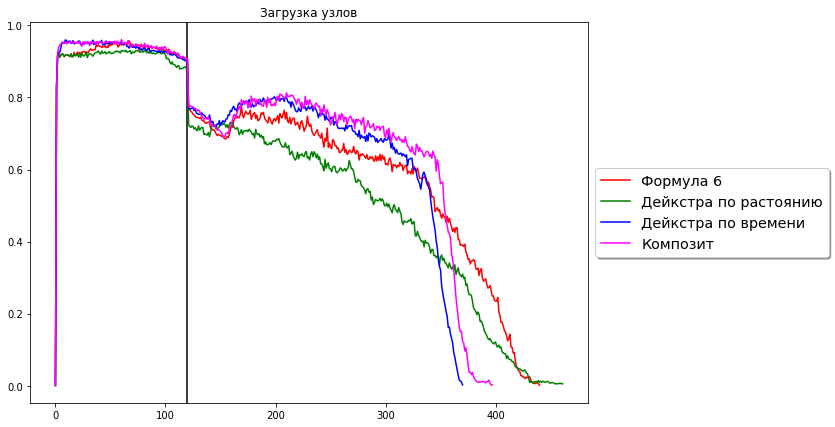

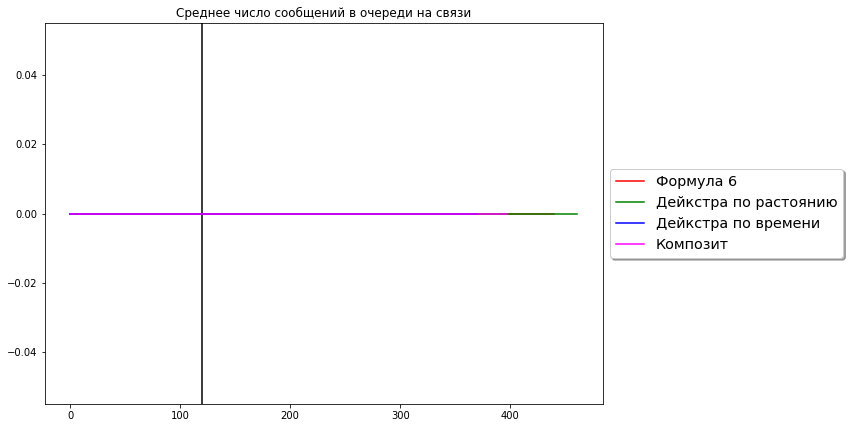

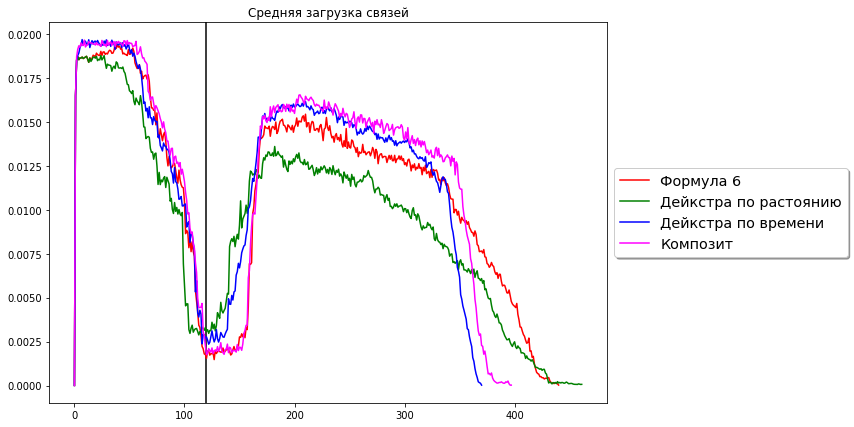

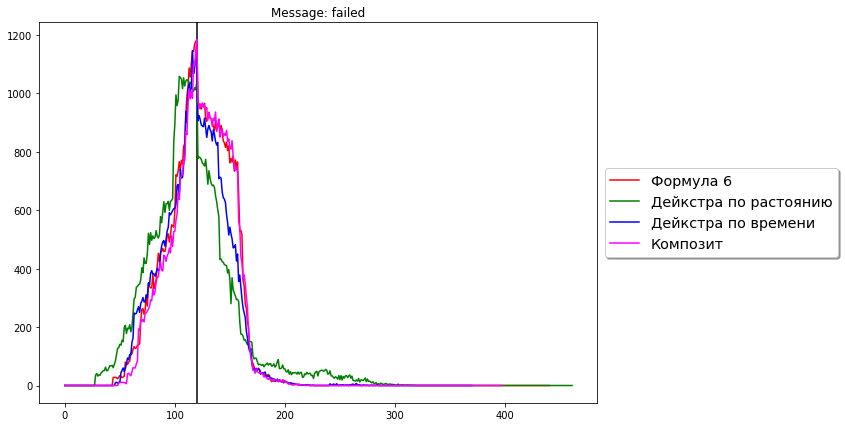

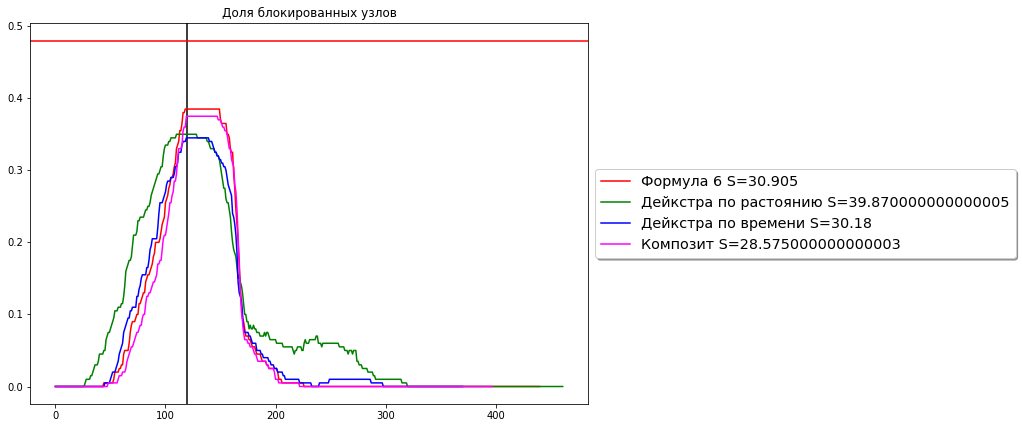

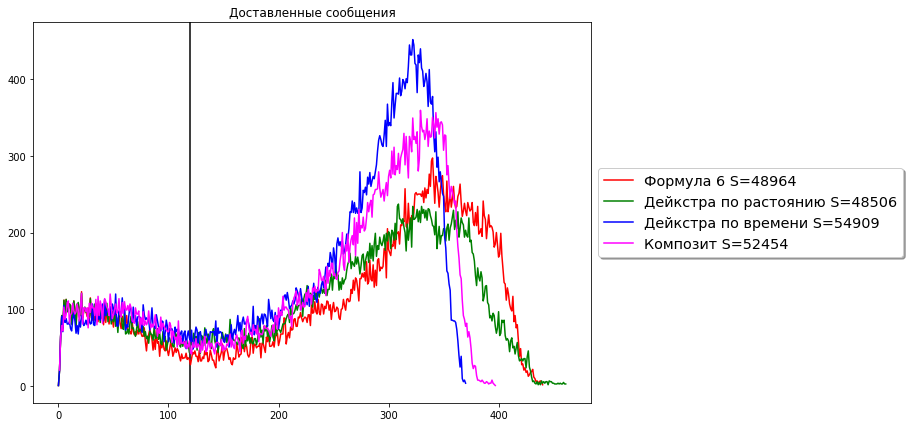

In [4]:
log_tags = [
 {"tag":  "b8a33037-9df4-4d40-9f05-ecf5e8eb1ce8", "label": "Формула 6", "color": "red"},
 {"tag":  "20cbcef5-7ba8-402b-820e-43751dc2f9a3", "label": "Дейкстра по растоянию", "color": "green"},
 {"tag":  "c3dd56e0-0a66-416d-9fc9-25db5bd35e0c", "label": "Дейкстра по времени", "color": "blue"},
 {"tag":  "426f5763-8a58-4062-b75d-69708be7d7ec", "label": "Композит", "color": "magenta"},
]
showStat()
showStatBlocked();  
showStatMessage();